In [3]:
##open and read file into list
import csv
f = open("guns.csv")
readfile = csv.reader(f)
data = list(readfile)

In [4]:
##Pull headers from data into new variable then remove from data
headers = data[0]
data = data[1:len(data)]

In [5]:
headers

['',
 'year',
 'month',
 'intent',
 'police',
 'sex',
 'age',
 'race',
 'hispanic',
 'place',
 'education']

In [6]:
##Extract years column from data
years = [row[1] for row in data]

In [7]:
##count gun deaths by year into dictionary
year_counts = {}
for element in years:
    if element not in year_counts:
        year_counts[element] = 1
    elif element in year_counts:
        year_counts[element] += 1
year_counts

{'2012': 33563, '2013': 33636, '2014': 33599}

In [8]:
##Create datetime list from data
import datetime
dates = [datetime.datetime(year = int(row[1]), month = int(row[2]), day = 1) for row in data]
dates[:5]

[datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 2, 1, 0, 0),
 datetime.datetime(2012, 2, 1, 0, 0)]

In [9]:
date_counts = {}
for element in dates:
    if element not in date_counts:
        date_counts[element] = 1
    elif element in date_counts:
        date_counts[element] += 1

In [10]:
##count gun deaths by sex
sex_counts = {}
for death in data:
    if death[5] not in sex_counts:
        sex_counts[death[5]] = 1
    elif death[5] in sex_counts:
        sex_counts[death[5]] += 1

sex_counts

{'F': 14449, 'M': 86349}

In [11]:
##count gun deaths by race
race_counts = {}
for death in data:
    if death[7] not in race_counts:
        race_counts[death[7]] = 1
    elif death[7] in race_counts:
        race_counts[death[7]] += 1
race_counts

{'Asian/Pacific Islander': 1326,
 'Black': 23296,
 'Hispanic': 9022,
 'Native American/Native Alaskan': 917,
 'White': 66237}

### So far I've learned that year by year gun deaths have remained relatively unchanged, but by month there tends to be a peak around July. There are more gun related deaths amongst males[all races] and White/Caucasians [all sexs]

### Further examination should be done on intent (further split between sex, race and education)

In [12]:
g = open("census.csv")
readfile = csv.reader(g)
census = list(readfile)

In [13]:
census

[['Id',
  'Year',
  'Id',
  'Sex',
  'Id',
  'Hispanic Origin',
  'Id',
  'Id2',
  'Geography',
  'Total',
  'Race Alone - White',
  'Race Alone - Hispanic',
  'Race Alone - Black or African American',
  'Race Alone - American Indian and Alaska Native',
  'Race Alone - Asian',
  'Race Alone - Native Hawaiian and Other Pacific Islander',
  'Two or More Races'],
 ['cen42010',
  'April 1, 2010 Census',
  'totsex',
  'Both Sexes',
  'tothisp',
  'Total',
  '0100000US',
  '',
  'United States',
  '308745538',
  '197318956',
  '44618105',
  '40250635',
  '3739506',
  '15159516',
  '674625',
  '6984195']]

In [14]:
##Manual Dictionary creation mapping census counts with race from gundeaths race groupings
mapping = {}
for key in race_counts:
    mapping[key] = 1
mapping['Asian/Pacific Islander'] = 15834141
mapping['Black'] = 40250635
mapping['Hispanic'] = 44618105
mapping['White'] = 197318956
mapping['Native American/Native Alaskan'] = 3739506
mapping

{'Asian/Pacific Islander': 15834141,
 'Black': 40250635,
 'Hispanic': 44618105,
 'Native American/Native Alaskan': 3739506,
 'White': 197318956}

In [15]:
##Divide gundeaths by population count per race, multiply by 100,000 to get deaths per 100,000 heads
race_per_hundredk = {}
for key in race_counts:
    race_per_hundredk[key] = race_counts[key] / mapping[key] * 100000
print(race_per_hundredk)

{'White': 33.56849303419181, 'Asian/Pacific Islander': 8.374309664161762, 'Black': 57.8773477735196, 'Native American/Native Alaskan': 24.521955573811088, 'Hispanic': 20.220491210910907}


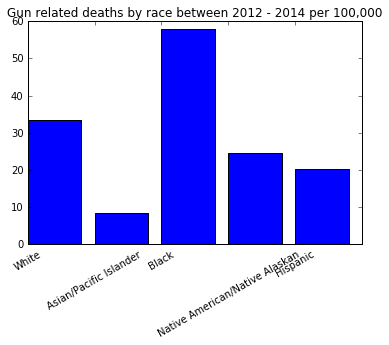

In [16]:
##plot gundeaths per 100,000 by race
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(len(race_per_hundredk)), race_per_hundredk.values())
plt.xticks(range(len(race_per_hundredk)), list(race_per_hundredk.keys()), rotation= 30)
plt.title("Gun related deaths by race between 2012 - 2014 per 100,000")
plt.show()

In [17]:
##Use Enumerate loop to filter gundeaths by homicide amongst race groups
intents = [row[3] for row in data]
races = [row[7] for row in data]

homicide_race_per_hundredk = {}
for i, item in enumerate(races):
    if intents[i] == "Homicide":
        if item not in homicide_race_per_hundredk:
            homicide_race_per_hundredk[item] = 1
        elif item in homicide_race_per_hundredk:
            homicide_race_per_hundredk[item] += 1

for key in homicide_race_per_hundredk:
    homicide_race_per_hundredk[key] = homicide_race_per_hundredk[key] / mapping[key] * 100000

print(homicide_race_per_hundredk)

{'White': 4.6356417981453335, 'Asian/Pacific Islander': 3.530346230970155, 'Black': 48.471284987180944, 'Native American/Native Alaskan': 8.717729026240365, 'Hispanic': 12.627161104219914}


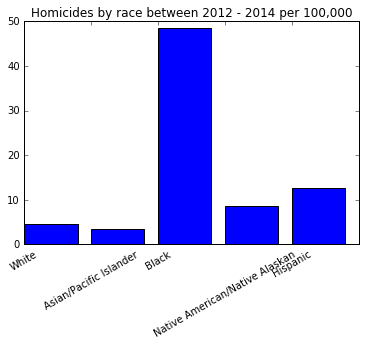

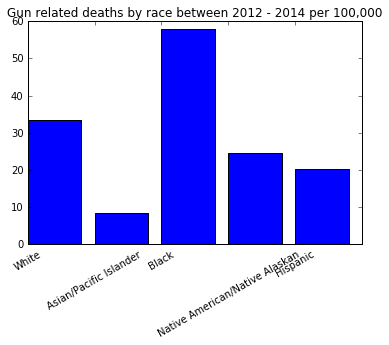

In [21]:
##plot homicides per 100,000 by race
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(len(homicide_race_per_hundredk)), homicide_race_per_hundredk.values())
plt.xticks(range(len(homicide_race_per_hundredk)), list(homicide_race_per_hundredk.keys()), rotation= 30)
plt.title("Homicides by race between 2012 - 2014 per 100,000")
plt.show()
plt.bar(range(len(race_per_hundredk)), race_per_hundredk.values())
plt.xticks(range(len(race_per_hundredk)), list(race_per_hundredk.keys()), rotation= 30)
plt.title("Gun related deaths by race between 2012 - 2014 per 100,000")
plt.show()